In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

In [2]:
notes_raw = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\EDA_Data\notes.csv')
alerts = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\EDA_Data\alerts_final.csv')
crypto_raw = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\crypto\bitcoin_per_minute_f.csv')

C:\Users\agrae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
notes_raw.drop('Unnamed: 0', inplace=True, axis=1)
alerts.drop('Unnamed: 0', inplace=True, axis=1)
crypto_raw.drop('Unnamed: 0', inplace=True, axis=1)

fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(alerts_pp, x='market', ax=ax)
plt.xticks(rotation=60)
plt.show()

In [4]:
alerts.head()

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into
0,6,1345,regular_update,BITSTAMP,BTC_EUR,0,0,NaN,2,5min,1/17/2017 8:50,3/31/2017 23:00,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTC,EUR
1,53,1040,regular_update,BTCE,BTC_EUR,0,0,NaN,249,5min,1/18/2017 9:54,5/16/2017 1:55,NaN,NaN,buy_price,"""12h""",NaN,NaN,BTC,EUR
2,56,1327,regular_update,COINBASE,BTC_USD,1,0,NaN,1143,5min,1/18/2017 10:23,7/30/2020 23:00,NaN,7/30/2020 23:00,sell_price,"""1day""",NaN,NaN,BTC,USD
3,57,1375,regular_update,KRAKEN,XBT_EUR,0,0,NaN,46,5min,1/18/2017 11:03,5/16/2017 1:55,NaN,NaN,buy_price,"""1day""",NaN,NaN,XBT,EUR
4,93,1385,regular_update,BTCE,BTC_USD,0,0,NaN,1690,5min,1/19/2017 0:34,2/25/2017 8:00,NaN,NaN,buy_price,"""30min""",NaN,NaN,BTC,USD


In [5]:
alerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102224 entries, 0 to 102223
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 102224 non-null  int64  
 1   user_id            102224 non-null  int64  
 2   type               102224 non-null  object 
 3   market             102224 non-null  object 
 4   currency           102019 non-null  object 
 5   is_active          102224 non-null  int64  
 6   is_deleted         102224 non-null  int64  
 7   max_notifications  101217 non-null  float64
 8   notifications      102224 non-null  int64  
 9   snooze             102224 non-null  object 
 10  created_at         102224 non-null  object 
 11  updated_at         96736 non-null   object 
 12  deleted_at         21076 non-null   object 
 13  last_checked       21320 non-null   object 
 14  comparison         92760 non-null   object 
 15  value              92760 non-null   object 
 16  op

In [6]:
alerts.head()

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into
0,6,1345,regular_update,BITSTAMP,BTC_EUR,0,0,NaN,2,5min,1/17/2017 8:50,3/31/2017 23:00,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTC,EUR
1,53,1040,regular_update,BTCE,BTC_EUR,0,0,NaN,249,5min,1/18/2017 9:54,5/16/2017 1:55,NaN,NaN,buy_price,"""12h""",NaN,NaN,BTC,EUR
2,56,1327,regular_update,COINBASE,BTC_USD,1,0,NaN,1143,5min,1/18/2017 10:23,7/30/2020 23:00,NaN,7/30/2020 23:00,sell_price,"""1day""",NaN,NaN,BTC,USD
3,57,1375,regular_update,KRAKEN,XBT_EUR,0,0,NaN,46,5min,1/18/2017 11:03,5/16/2017 1:55,NaN,NaN,buy_price,"""1day""",NaN,NaN,XBT,EUR
4,93,1385,regular_update,BTCE,BTC_USD,0,0,NaN,1690,5min,1/19/2017 0:34,2/25/2017 8:00,NaN,NaN,buy_price,"""30min""",NaN,NaN,BTC,USD


In [7]:
alerts_cur_count = alerts.cur_from.value_counts(1)
alerts_cur_count[:10], alerts_cur_count[:10].sum()

(BTC     0.409816
 ETH     0.100501
 LTC     0.050393
 USDT    0.041149
 XRP     0.037728
 XBT     0.025829
 BCH     0.016811
 TRX     0.015478
 ADA     0.012743
 EOS     0.011429
 Name: cur_from, dtype: float64,
 0.7218753369470392)

As we can see, the top 10 alert coins of interest make up about 72% of all alert types with Bitcoin being the vast majority of 41%. Let's see what people are wanting to compare their currency of choice into.

After fiddling with the 'cur_into' columns, I've discovered that all values have an additional space in from of them. Let's remove them so the feature will be usable.

In [8]:
alerts['cur_into'] = alerts.cur_into.replace(' ', '', regex=True)

In [9]:
alerts_cur_into_count = alerts.cur_into.value_counts(1)
alerts_cur_into_count[:10], alerts_cur_into_count[:10].sum()

(USD     0.345255
 BTC     0.226345
 USDT    0.065316
 ETH     0.057665
 EUR     0.049700
 XRP     0.013669
 AUD     0.008329
 NEO     0.007847
 LTC     0.007041
 BCC     0.004661
 Name: cur_into, dtype: float64,
 0.7858294817582852)

Mostly they're comparing cryptos with US dollars and Bitcoin. No surprises there. We'll check the top markets.

In [10]:
alerts.market.value_counts(1)[:5]

BINANCE     0.265662
BITTREX     0.186130
COINBASE    0.169168
POLONIEX    0.064642
KRAKEN      0.057756
Name: market, dtype: float64

Let's also start a little feature engineering by turning our categorical culumns into numerical features.

In [11]:
alerts.operator.unique()

array([nan, ' "<="', ' ">="'], dtype=object)

In [12]:
alerts['operator'] = alerts.operator.replace({' "<="':0, ' ">="':1}, regex=True)

In [13]:
alerts.operator.unique()

array([nan,  0.,  1.])

In [14]:
alerts.head()

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into
0,6,1345,regular_update,BITSTAMP,BTC_EUR,0,0,NaN,2,5min,1/17/2017 8:50,3/31/2017 23:00,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTC,EUR
1,53,1040,regular_update,BTCE,BTC_EUR,0,0,NaN,249,5min,1/18/2017 9:54,5/16/2017 1:55,NaN,NaN,buy_price,"""12h""",NaN,NaN,BTC,EUR
2,56,1327,regular_update,COINBASE,BTC_USD,1,0,NaN,1143,5min,1/18/2017 10:23,7/30/2020 23:00,NaN,7/30/2020 23:00,sell_price,"""1day""",NaN,NaN,BTC,USD
3,57,1375,regular_update,KRAKEN,XBT_EUR,0,0,NaN,46,5min,1/18/2017 11:03,5/16/2017 1:55,NaN,NaN,buy_price,"""1day""",NaN,NaN,XBT,EUR
4,93,1385,regular_update,BTCE,BTC_USD,0,0,NaN,1690,5min,1/19/2017 0:34,2/25/2017 8:00,NaN,NaN,buy_price,"""30min""",NaN,NaN,BTC,USD


In [15]:
alerts.time_period.unique()

array([nan, ' "5min"', ' "1h"', ' "1day"', ' "1week"', ' "30min"',
       ' "15min"', ' "2h"', ' "12h"', ' "3day"', ' "6h"', ' "4h"'],
      dtype=object)

In [16]:
alerts['time_period'] = alerts.time_period.replace({' "5min"':0, ' "15min"':1, ' "30min"':2, ' "1h"':3, ' "2h"':4, ' "4h"':5, ' "6h"':6, ' "12h"':7, ' "1day"':8, ' "3day"':9, ' "1week"':10}, regex=True)

In [17]:
alerts.time_period.unique()

array([nan,  0.,  3.,  8., 10.,  2.,  1.,  4.,  7.,  9.,  6.,  5.])

In [18]:
alerts.value.unique()[:20]

array([' "1day"', ' "12h"', ' "30min"', ' "6h"', ' "3h"', ' "3day"',
       ' "1week"', ' "1h"', ' "2h"', nan, ' "10"', ' "8"', ' "30"',
       ' "null"', ' "500"', ' "0.5"', ' "0.4"', ' "20"', ' "5"', ' "1"'],
      dtype=object)

In [19]:
alerts[alerts.value == ' "1day"']

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into
0,6,1345,regular_update,BITSTAMP,BTC_EUR,0,0,NaN,2,5min,1/17/2017 8:50,3/31/2017 23:00,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTC,EUR
2,56,1327,regular_update,COINBASE,BTC_USD,1,0,NaN,1143,5min,1/18/2017 10:23,7/30/2020 23:00,NaN,7/30/2020 23:00,sell_price,"""1day""",NaN,NaN,BTC,USD
3,57,1375,regular_update,KRAKEN,XBT_EUR,0,0,NaN,46,5min,1/18/2017 11:03,5/16/2017 1:55,NaN,NaN,buy_price,"""1day""",NaN,NaN,XBT,EUR
9,186,1418,regular_update,KRAKEN,ETH_USD,0,0,NaN,46,5min,1/19/2017 22:12,5/16/2017 1:55,NaN,NaN,sell_price,"""1day""",NaN,NaN,ETH,USD
10,188,1418,regular_update,KRAKEN,ICN_ETH,0,0,NaN,46,5min,1/19/2017 22:12,5/16/2017 1:55,NaN,NaN,sell_price,"""1day""",NaN,NaN,ICN,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,174421,75185,regular_update,BITCOINCOID,BTS_BTC,0,1,NaN,3,5min,5/13/2020 3:44,5/13/2020 20:52,5/13/2020 20:52,5/13/2020 18:00,buy_price,"""1day""",NaN,NaN,BTS,BTC
993,174715,75185,regular_update,BITCOINCOID,BTS_BTC,0,1,NaN,0,5min,5/20/2020 22:38,5/20/2020 22:38,5/20/2020 22:38,NaN,buy_price,"""1day""",NaN,NaN,BTS,BTC
994,174716,75185,regular_update,BITCOINCOID,BTS_BTC,0,0,NaN,0,5min,5/20/2020 22:38,NaN,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTS,BTC
995,174720,75185,regular_update,BITCOINCOID,BTS_BTC,0,1,NaN,0,5min,5/20/2020 22:46,5/20/2020 22:46,5/20/2020 22:46,NaN,buy_price,"""1day""",NaN,NaN,BTS,BTC


In [20]:
alerts.comparison.value_counts(0)[:15].sum

<bound method Series.sum of buy_price        68650
sell_price       16794
volume            2862
high_price        2021
low_price         1509
agerage_price      785
average_price      136
volume_price         3
Name: comparison, dtype: int64>

In [21]:
alerts[alerts.comparison == 'volume_price']

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into
17538,97989,54401,percent_change,BITMEX,XBT_USD,1,0,10.0,0,5min,7/18/2018 8:43,9/24/2018 9:06,NaN,NaN,volume_price,"""1""",1.0,0.0,XBT,USD
17541,98029,54076,percent_change,BINANCE,APPC_BTC,0,1,10.0,10,5min,7/18/2018 14:51,7/13/2019 4:52,NaN,7/25/2018 13:14,volume_price,"""50""",1.0,3.0,APPC,BTC
17647,101921,54845,percent_change,CRYPTOPIA,BIS_BTC,0,1,1.0,0,5min,7/29/2018 16:49,8/28/2018 0:29,8/28/2018 0:29,NaN,volume_price,"""40""",1.0,5.0,BIS,BTC


In [22]:
alerts[alerts.type == 'regular_update'].comparison.unique()

array(['buy_price', 'sell_price', 'low_price', 'high_price', nan,
       'volume', 'average_price'], dtype=object)

In [23]:
alerts[alerts.type == 'percent_change'].comparison.unique()

array(['buy_price', 'sell_price', 'low_price', 'high_price',
       'average_price', nan, 'volume', 'volume_price'], dtype=object)

In [24]:
alerts[alerts.type == 'price_point'].comparison.unique()

array(['sell_price', 'buy_price', 'high_price', 'low_price',
       'agerage_price', 'volume', nan], dtype=object)

In [25]:
alerts.type.unique()

array(['regular_update', 'percent_change', 'price_point'], dtype=object)

In [26]:
alerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102224 entries, 0 to 102223
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 102224 non-null  int64  
 1   user_id            102224 non-null  int64  
 2   type               102224 non-null  object 
 3   market             102224 non-null  object 
 4   currency           102019 non-null  object 
 5   is_active          102224 non-null  int64  
 6   is_deleted         102224 non-null  int64  
 7   max_notifications  101217 non-null  float64
 8   notifications      102224 non-null  int64  
 9   snooze             102224 non-null  object 
 10  created_at         102224 non-null  object 
 11  updated_at         96736 non-null   object 
 12  deleted_at         21076 non-null   object 
 13  last_checked       21320 non-null   object 
 14  comparison         92760 non-null   object 
 15  value              92760 non-null   object 
 16  op

In [27]:
#alerts['comparison'] = alerts.comparison.replace({' "<="':0, ' ">="':1}, regex=True)

In [28]:
alerts.type.unique()

array(['regular_update', 'percent_change', 'price_point'], dtype=object)

In [29]:
alerts['type_as_num'] = alerts.type.replace({'regular_update':0, 'percent_change':1, 'price_point':2}, regex=True)

In [30]:
alerts.head()

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,...,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into,type_as_num
0,6,1345,regular_update,BITSTAMP,BTC_EUR,0,0,NaN,2,5min,...,3/31/2017 23:00,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTC,EUR,0
1,53,1040,regular_update,BTCE,BTC_EUR,0,0,NaN,249,5min,...,5/16/2017 1:55,NaN,NaN,buy_price,"""12h""",NaN,NaN,BTC,EUR,0
2,56,1327,regular_update,COINBASE,BTC_USD,1,0,NaN,1143,5min,...,7/30/2020 23:00,NaN,7/30/2020 23:00,sell_price,"""1day""",NaN,NaN,BTC,USD,0
3,57,1375,regular_update,KRAKEN,XBT_EUR,0,0,NaN,46,5min,...,5/16/2017 1:55,NaN,NaN,buy_price,"""1day""",NaN,NaN,XBT,EUR,0
4,93,1385,regular_update,BTCE,BTC_USD,0,0,NaN,1690,5min,...,2/25/2017 8:00,NaN,NaN,buy_price,"""30min""",NaN,NaN,BTC,USD,0


-

-

Let's start looking into the notes DF.

In [31]:
notes_raw[notes_raw.alert_id == 6]

,id,alert_id,user_id,user_channels,message,created_at
40938,40939,6,1345,7,Your BITSTAMP - BTC_EUR alert has been trigger...,2017-03-31 23:00:18
40940,40941,6,1345,129,SMS Credits exhausted and the alert has been p...,2017-03-31 23:00:19


In [32]:
notes_raw.user_channels.nunique(), notes_raw.user_id.nunique()

(27076, 22824)

Interesting, we have more user channels then we do user id's.

In [33]:
notes_raw.message[0]

'Your GDAX - BTC_USD alert has been triggered. Alert me when the buy price is less than 1000. The buy price is currently 891.69.'

In [34]:
notes_use_vcount = notes_raw.user_id.value_counts(1)
notes_use_vcount[:10], notes_use_vcount[:10].sum()

(2        0.047480
 13997    0.036018
 21157    0.029195
 48258    0.028308
 56887    0.027487
 44652    0.021033
 61933    0.019671
 16407    0.019482
 47942    0.018711
 28409    0.017988
 Name: user_id, dtype: float64,
 0.26537282411450974)

Alright we've seen what an average note might look like and how many of the notes are from the different users. It looks like about 5% of them are from the company's creator (user '2'). Let's see the number of alerts for bitcoin vs market cap. We'll change all dates into datetime objects for ease of use.

In [35]:
notes = notes_raw

In [36]:
notes['created_at'] = pd.to_datetime(notes.created_at)

In [37]:
notes.head()

,id,alert_id,user_id,user_channels,message,created_at
0,1,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05
1,2,4,2,2,Coindera Alert: GDAX - BTC_USD. The buy price...,2017-01-17 07:55:05
2,3,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05
3,4,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:09
4,5,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:10


In [38]:
notes.set_index(notes.created_at, inplace=True)

In [39]:
notes_count_per = notes.resample('D').apply({'message':'count'})
notes_count_per

,message
created_at,
2017-01-17,30
2017-01-18,53
2017-01-19,165
2017-01-20,85
2017-01-21,112
...,...
2020-07-27,2382
2020-07-28,1290
2020-07-29,1453


<AxesSubplot:xlabel='created_at'>

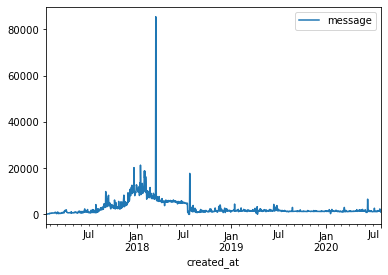

In [40]:
notes_count_per.plot()

Let's start looking at bitcoin now. We'll start by 

In [41]:
bitcoin = crypto_raw
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Open               float64
 1   High               float64
 2   Low                float64
 3   Close              float64
 4   Volume_(BTC)       float64
 5   Volume_(Currency)  float64
 6   Weighted_Price     float64
 7   date               object 
dtypes: float64(7), object(1)
memory usage: 296.5+ MB


In [42]:
bitcoin['date'] = pd.to_datetime(bitcoin.date)
bitcoin.set_index(bitcoin.date, inplace=True)
bitcoin.rename({'Volume_(BTC)': 'volume_btc', 'Volume_(Currency)': 'volume_usd'}, axis=1, inplace=True)
bitcoin.drop('date', axis=1, inplace=True)

In [43]:
btc_cur = bitcoin.iloc[2648800:4510000]
btc_cur

,Open,High,Low,Close,volume_btc,volume_usd,Weighted_Price
date,,,,,,,
2017-01-17 06:24:00+00:00,860.26,860.98,859.56,859.81,16.454446,14150.681559,859.991377
2017-01-17 06:25:00+00:00,860.98,860.98,859.65,859.65,9.988582,8587.427344,859.724396
2017-01-17 06:26:00+00:00,859.65,860.97,859.65,859.65,11.393229,9796.832804,859.881989
2017-01-17 06:27:00+00:00,859.65,860.96,856.40,857.16,20.606028,17659.124466,856.988299
2017-01-17 06:28:00+00:00,857.16,860.36,856.68,857.50,6.352490,5451.871161,858.225890
...,...,...,...,...,...,...,...
2020-08-01 18:19:00+00:00,11649.71,11670.11,11645.00,11658.35,30.804353,358967.389740,11653.138411
2020-08-01 18:20:00+00:00,11650.00,11655.54,11645.03,11645.69,2.210218,25742.591594,11647.081170
2020-08-01 18:21:00+00:00,11655.57,11656.65,11648.46,11650.00,1.745046,20329.446307,11649.807065


In [44]:
btc_cur.isna().sum()

Open              81377
High              81377
Low               81377
Close             81377
volume_btc        81377
volume_usd        81377
Weighted_Price    81377
dtype: int64

Let's forward fill these values before we start graphing.

In [45]:
btc_cur.fillna(method='ffill', inplace=True)

C:\Users\agrae\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [46]:
btc_cur.describe()

,Open,High,Low,Close,volume_btc,volume_usd,Weighted_Price
count,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06
mean,6.730654e+03,6.735335e+03,6.725636e+03,6.730566e+03,7.263599e+00,4.951652e+04,6.730555e+03
std,3.301799e+03,3.305258e+03,3.297908e+03,3.301715e+03,1.824072e+01,1.362401e+05,3.301680e+03
min,8.520000e+02,8.529800e+02,8.517400e+02,8.520000e+02,0.000000e+00,0.000000e+00,8.520526e+02
25%,3.963340e+03,3.964870e+03,3.961767e+03,3.963370e+03,3.453121e-01,1.835208e+03,3.963225e+03
50%,6.955890e+03,6.960000e+03,6.951000e+03,6.955630e+03,1.917232e+00,1.073066e+04,6.955558e+03
75%,9.113042e+03,9.117650e+03,9.108413e+03,9.113110e+03,6.835743e+00,4.162546e+04,9.113360e+03
max,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,1.616060e+03,1.044599e+07,1.966330e+04


It is unlikely that the volume of bitcoin being traded has ever actually been 0. Let's see if this is a common event with this data or a singular error.

In [47]:
btc_cur[btc_cur.volume_btc == 0]

,Open,High,Low,Close,volume_btc,volume_usd,Weighted_Price
date,,,,,,,
2017-08-14 01:08:00+00:00,4068.49,4068.49,4068.49,4068.49,0.0,0.0,4068.49


It looks like an error. Let's fill forward fill those 0's.

In [48]:
btc_cur.replace(to_replace=0, method='ffill', inplace=True)

Open              None
High              None
Low               None
Close             None
volume_btc        None
volume_usd        None
Weighted_Price    None
dtype: object

In [49]:
btc_cur.describe()

,Open,High,Low,Close,volume_btc,volume_usd,Weighted_Price
count,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06,1.861200e+06
mean,6.730654e+03,6.735335e+03,6.725636e+03,6.730566e+03,7.263599e+00,4.951652e+04,6.730555e+03
std,3.301799e+03,3.305258e+03,3.297908e+03,3.301715e+03,1.824072e+01,1.362401e+05,3.301680e+03
min,8.520000e+02,8.529800e+02,8.517400e+02,8.520000e+02,1.000000e-08,9.741900e-06,8.520526e+02
25%,3.963340e+03,3.964870e+03,3.961767e+03,3.963370e+03,3.453121e-01,1.835208e+03,3.963225e+03
50%,6.955890e+03,6.960000e+03,6.951000e+03,6.955630e+03,1.917232e+00,1.073066e+04,6.955558e+03
75%,9.113042e+03,9.117650e+03,9.108413e+03,9.113110e+03,6.835743e+00,4.162546e+04,9.113360e+03
max,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,1.616060e+03,1.044599e+07,1.966330e+04


<AxesSubplot:xlabel='date'>

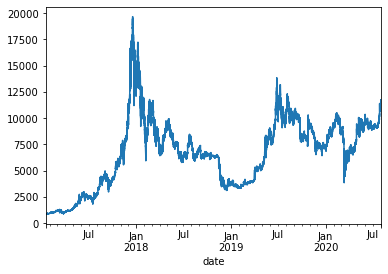

In [50]:
btc_cur.Open.plot()

<AxesSubplot:xlabel='date'>

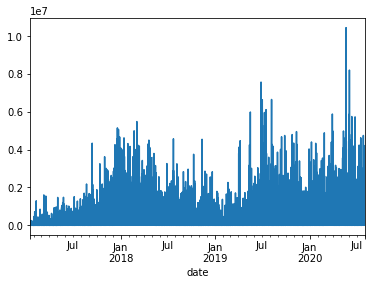

In [51]:
btc_cur.volume_usd.plot()

<AxesSubplot:xlabel='date'>

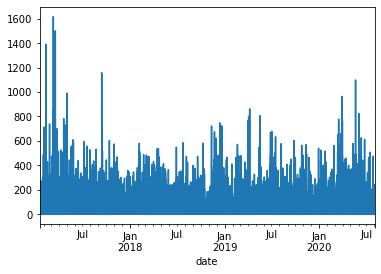

In [52]:
btc_cur.volume_btc.plot()

<AxesSubplot:>

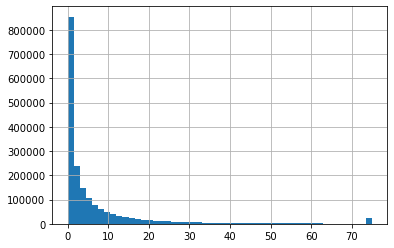

In [53]:
btc_cur.volume_btc.clip(upper=75).hist(bins=50)

<AxesSubplot:>

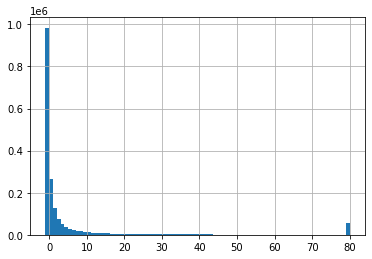

In [54]:
btc_cur.volume_btc.pct_change().clip(upper=80).hist(bins=80)

<AxesSubplot:>

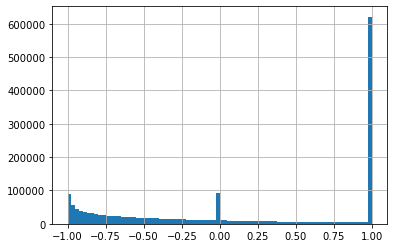

In [55]:
btc_cur.volume_btc.pct_change().clip(upper=1).hist(bins=80)

<AxesSubplot:>

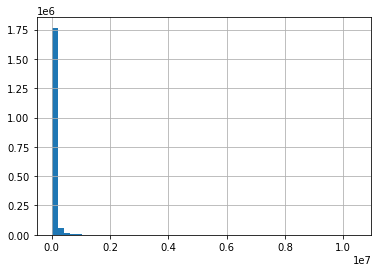

In [56]:
btc_cur.volume_usd.hist(bins=50)

As we can see, there are occasional massive changes in volume over time. This makes sense as we measuring in minutes. Let's try to write a function in order to change the time-frame.

In [57]:
btc_min_pct = btc_cur.pct_change()

In [58]:
def resample_to(data, time):
    btc_temp = pd.DataFrame()
    btc_time = pd.DataFrame()
    #Open
    btc_temp = pd.concat([btc_temp, data.Open], axis=1)
    btc_temp.set_index(btc_cur.index, inplace=True)
    btc_temp = btc_temp[['Open']].resample(time).mean()
    btc_time = pd.concat([btc_time, btc_temp], axis=1)
    btc_time.set_index(btc_temp.index, inplace=True)
    
    btc_temp = pd.DataFrame()
    #High
    btc_temp = pd.concat([btc_temp, data.High], axis=1)
    btc_temp.set_index(btc_cur.index, inplace=True)
    btc_temp = btc_temp[['High']].resample(time).max()
    btc_time = pd.concat([btc_time, btc_temp], axis=1)
    btc_time.set_index(btc_temp.index, inplace=True)
    
    btc_temp = pd.DataFrame()
    #Low
    btc_temp = pd.concat([btc_temp, data.Low], axis=1)
    btc_temp.set_index(btc_cur.index, inplace=True)
    btc_temp = btc_temp[['Low']].resample(time).min()
    btc_time = pd.concat([btc_time, btc_temp], axis=1)
    btc_time.set_index(btc_temp.index, inplace=True)
    
    btc_temp = pd.DataFrame()
    #Volume_btc
    btc_temp = pd.concat([btc_temp, data.volume_btc], axis=1)
    btc_temp.set_index(btc_cur.index, inplace=True)
    btc_temp = btc_temp[['volume_btc']].resample(time).sum()
    btc_time = pd.concat([btc_time, btc_temp], axis=1)
    btc_time.set_index(btc_temp.index, inplace=True)
    
    btc_temp = pd.DataFrame()
    #Volume_usd
    btc_temp = pd.concat([btc_temp, data.volume_usd], axis=1)
    btc_temp.set_index(btc_cur.index, inplace=True)
    btc_temp = btc_temp[['volume_usd']].resample(time).sum()
    btc_time = pd.concat([btc_time, btc_temp], axis=1)
    btc_time.set_index(btc_temp.index, inplace=True)
    
    btc_temp = pd.DataFrame()
    #Weighted_Price
    btc_temp = pd.concat([btc_temp, data.Weighted_Price], axis=1)
    btc_temp.set_index(btc_cur.index, inplace=True)
    btc_temp = btc_temp[['Weighted_Price']].resample(time).mean()
    btc_time = pd.concat([btc_time, btc_temp], axis=1)
    btc_time.set_index(btc_temp.index, inplace=True)
    
    return btc_time

In [59]:
btc_hours = resample_to(btc_cur, '1h')

In [60]:
btc_days = resample_to(btc_cur, '1d')

In [61]:
btc_hours.head()

,Open,High,Low,volume_btc,volume_usd,Weighted_Price
date,,,,,,
2017-01-17 06:00:00+00:00,858.296111,860.98,853.38,223.284030,1.915783e+05,858.183802
2017-01-17 07:00:00+00:00,872.410500,887.00,859.15,1405.439766,1.228326e+06,872.614791
2017-01-17 08:00:00+00:00,886.275833,896.23,875.96,1453.218840,1.287693e+06,886.358051
2017-01-17 09:00:00+00:00,881.240667,884.00,875.26,332.430980,2.929261e+05,881.249922
2017-01-17 10:00:00+00:00,884.869667,889.49,879.99,410.612440,3.635314e+05,884.945117


In [62]:
btc_days.head()

,Open,High,Low,volume_btc,volume_usd,Weighted_Price
date,,,,,,
2017-01-17 00:00:00+00:00,888.633703,908.50,853.38,10220.891834,9.075514e+06,888.634149
2017-01-18 00:00:00+00:00,885.385021,915.99,851.74,11851.890217,1.042392e+07,885.349045
2017-01-19 00:00:00+00:00,893.327590,910.00,878.89,12223.859187,1.093867e+07,893.333493
2017-01-20 00:00:00+00:00,895.570271,902.43,880.00,8471.489363,7.573545e+06,895.545172
2017-01-21 00:00:00+00:00,917.651562,928.00,895.00,6623.683965,6.069531e+06,917.660690


These look great! Let's regraph with our new time-tables.

In [63]:
btc_hours_pct = btc_hours.pct_change()

<AxesSubplot:xlabel='date'>

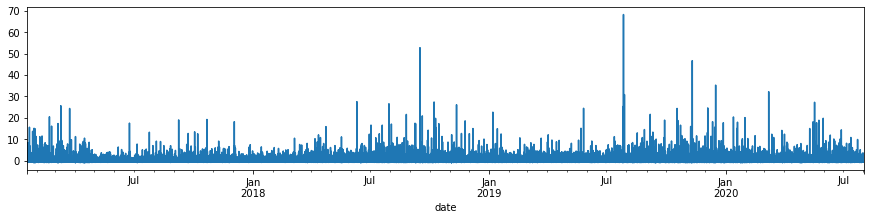

In [64]:
fig, ax = plt.subplots(figsize=(15, 3))  
btc_hours_pct.volume_btc.plot(ax=ax)

<AxesSubplot:xlabel='date'>

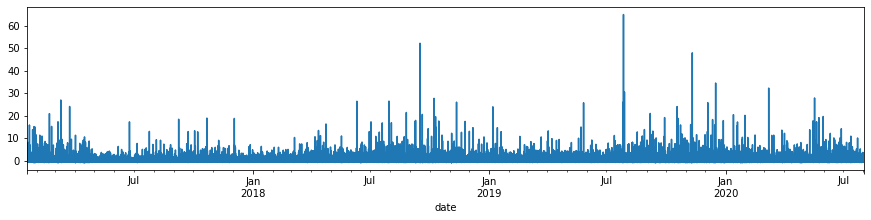

In [65]:
fig, ax = plt.subplots(figsize=(15, 3))
btc_hours_pct.volume_usd.plot(ax=ax)

This is a great sanity check. The graphs look almost identical with any slight differences possibly being explained by rounding.

In [66]:
btc_days_pct = btc_days.pct_change()

<AxesSubplot:xlabel='date'>

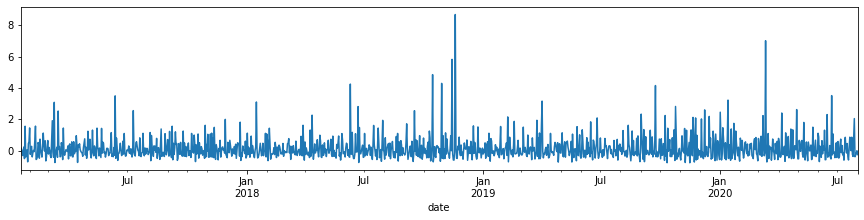

In [67]:
fig, ax = plt.subplots(figsize=(15, 3))  
btc_days_pct.volume_btc.plot(ax=ax)

<AxesSubplot:xlabel='date', ylabel='volume_btc'>

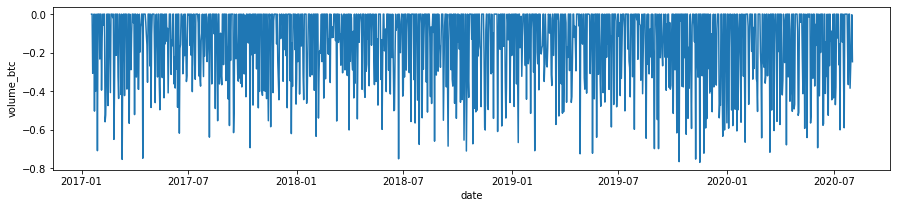

In [68]:
fig, ax = plt.subplots(figsize=(15, 3))  
sns.lineplot(data=btc_days_pct.volume_btc.clip(upper=0), ax=ax)

This is all looking pretty good. We've normalized our graphs and even found the negative growth stats. Let's see what it looks like in weeks.

In [69]:
btc_weeks = resample_to(btc_cur, '7d')

In [70]:
btc_weeks_pct = btc_weeks.pct_change()

<AxesSubplot:xlabel='date'>

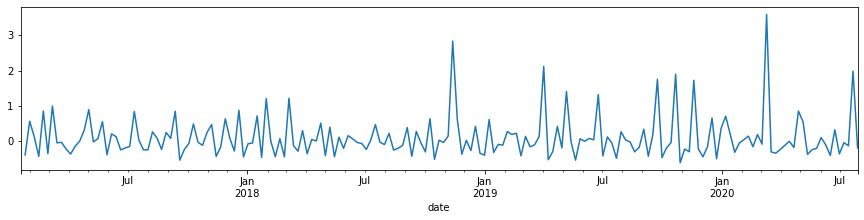

In [71]:
fig, ax = plt.subplots(figsize=(15, 3))  
btc_weeks_pct.volume_btc.plot(ax=ax)

<AxesSubplot:xlabel='date', ylabel='volume_btc'>

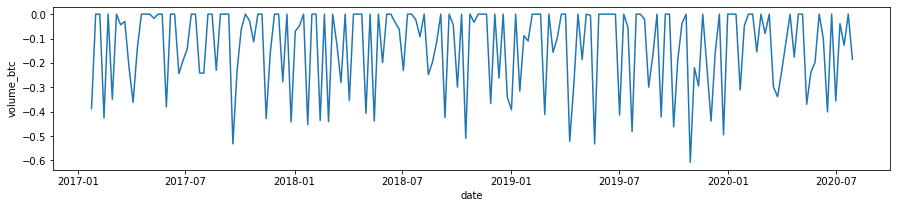

In [72]:
fig, ax = plt.subplots(figsize=(15, 3))  
sns.lineplot(data=btc_weeks_pct.volume_btc.clip(upper=0), ax=ax)

<AxesSubplot:xlabel='date'>

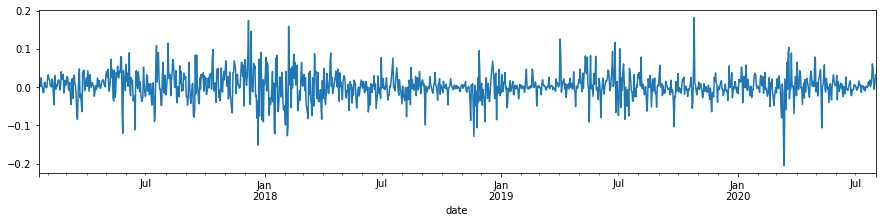

In [73]:
fig, ax = plt.subplots(figsize=(15, 3))  
btc_days_pct.Open.plot(ax=ax)

<AxesSubplot:xlabel='date'>

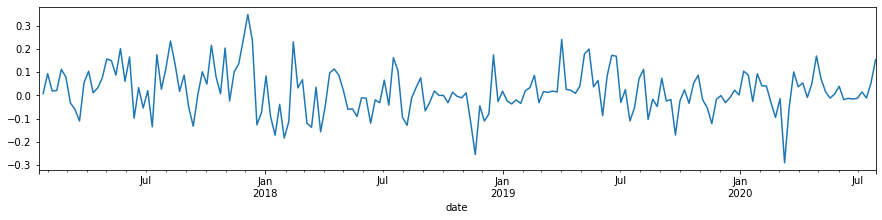

In [74]:
fig, ax = plt.subplots(figsize=(15, 3))  
btc_weeks_pct.Open.plot(ax=ax)

<AxesSubplot:>

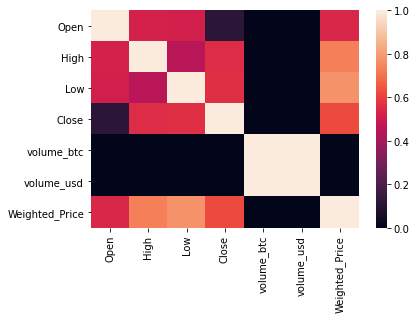

In [75]:
sns.heatmap(btc_min_pct.corr())

<AxesSubplot:>

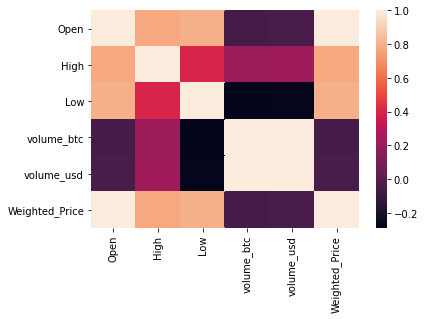

In [76]:
sns.heatmap(btc_hours_pct.corr())

<AxesSubplot:>

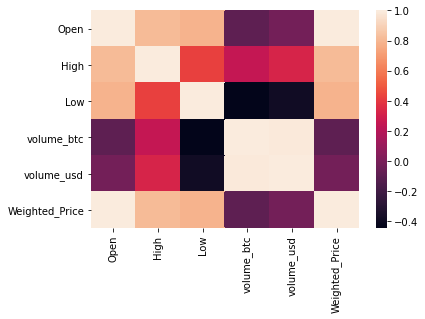

In [77]:
sns.heatmap(btc_days_pct.corr())

<AxesSubplot:>

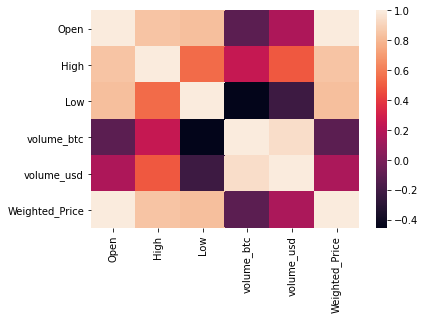

In [78]:
sns.heatmap(btc_weeks_pct.corr())

Let's combine this market data with the number of bitcoin notes. First we'll have to seperate out the notes only associated with bitcoin.

In [79]:
alerts.head()

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,...,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into,type_as_num
0,6,1345,regular_update,BITSTAMP,BTC_EUR,0,0,NaN,2,5min,...,3/31/2017 23:00,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTC,EUR,0
1,53,1040,regular_update,BTCE,BTC_EUR,0,0,NaN,249,5min,...,5/16/2017 1:55,NaN,NaN,buy_price,"""12h""",NaN,NaN,BTC,EUR,0
2,56,1327,regular_update,COINBASE,BTC_USD,1,0,NaN,1143,5min,...,7/30/2020 23:00,NaN,7/30/2020 23:00,sell_price,"""1day""",NaN,NaN,BTC,USD,0
3,57,1375,regular_update,KRAKEN,XBT_EUR,0,0,NaN,46,5min,...,5/16/2017 1:55,NaN,NaN,buy_price,"""1day""",NaN,NaN,XBT,EUR,0
4,93,1385,regular_update,BTCE,BTC_USD,0,0,NaN,1690,5min,...,2/25/2017 8:00,NaN,NaN,buy_price,"""30min""",NaN,NaN,BTC,USD,0


In [80]:
alerts_btc = alerts[(alerts.cur_from == 'BTC') | (alerts.cur_into == 'BTC')]
alerts_btc

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,...,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into,type_as_num
0,6,1345,regular_update,BITSTAMP,BTC_EUR,0,0,NaN,2,5min,...,3/31/2017 23:00,NaN,NaN,buy_price,"""1day""",NaN,NaN,BTC,EUR,0
1,53,1040,regular_update,BTCE,BTC_EUR,0,0,NaN,249,5min,...,5/16/2017 1:55,NaN,NaN,buy_price,"""12h""",NaN,NaN,BTC,EUR,0
2,56,1327,regular_update,COINBASE,BTC_USD,1,0,NaN,1143,5min,...,7/30/2020 23:00,NaN,7/30/2020 23:00,sell_price,"""1day""",NaN,NaN,BTC,USD,0
4,93,1385,regular_update,BTCE,BTC_USD,0,0,NaN,1690,5min,...,2/25/2017 8:00,NaN,NaN,buy_price,"""30min""",NaN,NaN,BTC,USD,0
5,97,1336,regular_update,BITSTAMP,BTC_USD,0,0,NaN,202,5min,...,5/16/2017 1:55,NaN,NaN,buy_price,"""12h""",NaN,NaN,BTC,USD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102212,176503,76181,price_point,COINBASE,BTC_USD,1,0,1.0,0,5min,...,7/31/2020 8:38,NaN,NaN,buy_price,"""5.5""",1.0,NaN,BTC,USD,2
102215,176506,20314,price_point,BITSTAMP,BTC_USD,0,1,1.0,0,5min,...,7/31/2020 11:25,7/31/2020 11:25,NaN,buy_price,"""0.012""",0.0,NaN,BTC,USD,2
102218,176509,11987,price_point,BINANCE,NKN_BTC,1,0,1.0,0,5min,...,NaN,NaN,NaN,buy_price,"""5""",0.0,NaN,NKN,BTC,2
102221,176512,45591,price_point,GDAX,BTC_USD,0,1,5.0,0,5min,...,7/31/2020 13:39,7/31/2020 13:39,NaN,buy_price,"""0.15""",1.0,NaN,BTC,USD,2


In [81]:
notes.rename({'id':'note_id', 'created_at':'note_created_at'}, axis=1, inplace=True)
alerts.rename({'id':'alert_id', 'created_at':'alert_created_at'}, axis=1, inplace=True)

In [82]:
notes.head()

,note_id,alert_id,user_id,user_channels,message,note_created_at
created_at,,,,,,
2017-01-17 07:55:05,1,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05
2017-01-17 07:55:05,2,4,2,2,Coindera Alert: GDAX - BTC_USD. The buy price...,2017-01-17 07:55:05
2017-01-17 07:55:05,3,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05
2017-01-17 08:00:09,4,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:09
2017-01-17 08:00:10,5,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:10


In [83]:
notes_full = notes.merge(alerts, on=['alert_id', 'user_id'], how='left')

In [84]:
notes_full.alert_id.isnull().sum()

0

In [85]:
notes_full.head()

,note_id,alert_id,user_id,user_channels,message,note_created_at,type,market,currency,is_active,...,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into,type_as_num
0,1,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,2,2,Coindera Alert: GDAX - BTC_USD. The buy price...,2017-01-17 07:55:05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
print(notes.message[22:23])

created_at
2017-01-17 21:00:05    Your GDAX - BTC_USD alert has been triggered. ...
Name: message, dtype: object


In [97]:
notes_full.deleted_at.isnull().sum()

3082057

In [87]:
alerts[alerts.notifications == 0]

,alert_id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,...,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into,type_as_num
17,314,1464,regular_update,BITSTAMP,BTC_USD,0,0,NaN,0,5min,...,4/9/2017 3:58,NaN,NaN,buy_price,"""1week""",NaN,NaN,BTC,USD,0
35,760,1650,regular_update,POLONIEX,ETC_USD,1,0,NaN,0,5min,...,5/24/2017 6:03,NaN,NaN,buy_price,"""3day""",NaN,NaN,ETC,USD,0
60,1078,1766,regular_update,GEMINI,BTC_USD,0,0,NaN,0,5min,...,5/16/2017 1:56,NaN,NaN,buy_price,"""1week""",NaN,NaN,BTC,USD,0
71,1166,1802,regular_update,BITTREX,DAS_H7D,0,0,NaN,0,5min,...,5/16/2017 1:56,NaN,NaN,buy_price,"""30min""",NaN,NaN,DAS,H7D,0
86,1365,1897,regular_update,COINBASE,BTC_USD,0,0,NaN,0,5min,...,5/16/2017 1:56,NaN,NaN,buy_price,"""1week""",NaN,NaN,BTC,USD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102219,176510,76183,price_point,BINANCE,XLM_USDT,1,0,100.0,0,5min,...,7/31/2020 13:01,NaN,7/31/2020 13:00,buy_price,"""0.00000217""",1.0,NaN,XLM,USDT,2
102220,176511,76183,price_point,BINANCE,ADA_USDT,1,0,10.0,0,5min,...,NaN,NaN,NaN,buy_price,"""0.1""",1.0,NaN,ADA,USDT,2
102221,176512,45591,price_point,GDAX,BTC_USD,0,1,5.0,0,5min,...,7/31/2020 13:39,7/31/2020 13:39,NaN,buy_price,"""0.15""",1.0,NaN,BTC,USD,2
102222,176513,45591,price_point,GDAX,BTC_USD,0,1,5.0,0,5min,...,7/31/2020 13:40,7/31/2020 13:40,NaN,sell_price,"""9980""",1.0,NaN,BTC,USD,2


In [88]:
alerts.shape

(102224, 21)

In [100]:
notes_full.to_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\notes_full.csv')